In [39]:
#convert csv file into dataframe
# for categoriacal col to handle text data we use dummy variables 
#Using pandas to create dummy variables  through command ==> dummies = pd.get_dummies(df.town)
# then combine dummy dataframe table and orignal dataframe using below  4 approach
#merged = pd.concat([df,dummies],axis='columns')
#combined_df = df.join(dummies)
#merged.drop(['town'], axis='columns')
#merged.drop(['town'], axis='columns')
#Using pandas to create dummy variables  through command without combine  ==> dummies = pd.get_dummies(df, columns=['town'])
# then drop one of the dummy variable colm from final dataframe
#final = final.drop(['west windsor'], axis='columns')  OR df_final=  dummies.drop('Car Model_BMW X5', axis=1)
# now generate model and trained the data
#calculates the accuracy of the logistic regression model on the test data or determine  how well the predicted values fit the actual values or difference between actual value and prediction value
#model.score(X,y)
#Using sklearn OneHotEncoder
#create object of LabelEncoder then use label encoding for town colunm==>le.fit_transform(dfle.town)
#seprate x and y value from dataframe table to trained them
# convert multiple colm to 2 dimensional array then get x value
#X = dfle[['town','area']].values
#NOTE: never apply one hot encoding on text data first convert it into numeric form using label encoding
#apply one hot encoding on town colm after convert into label encoding
#ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough') and ct.fit_transform(X)
# then drop one of the dummy variable colm from final dataframe
#X = X[:,1:]
# now generate model and trained the data

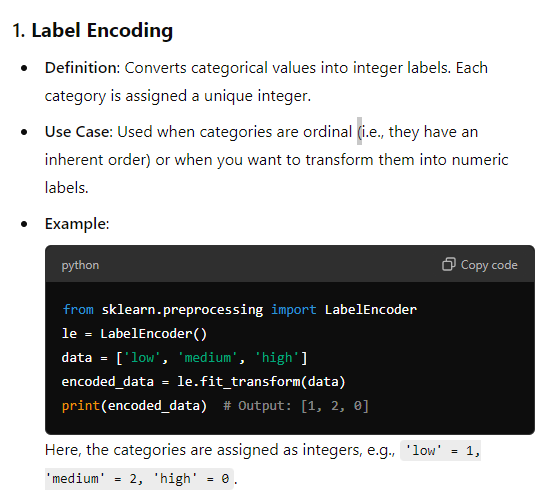

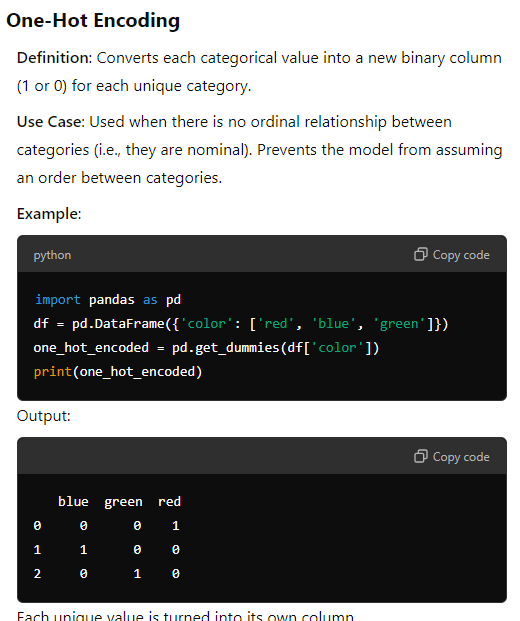

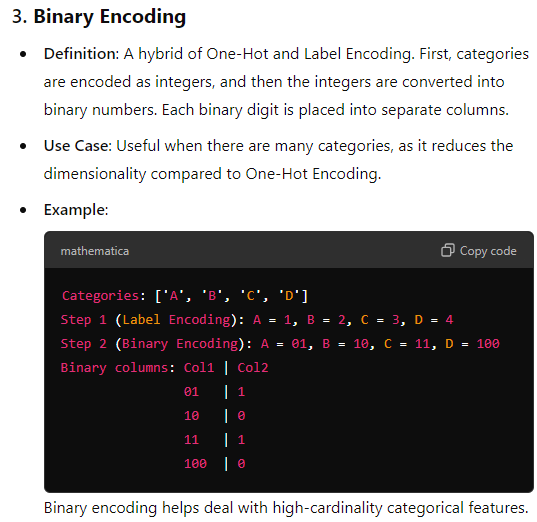

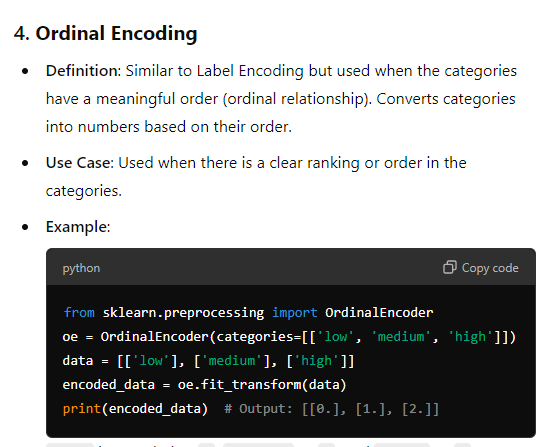

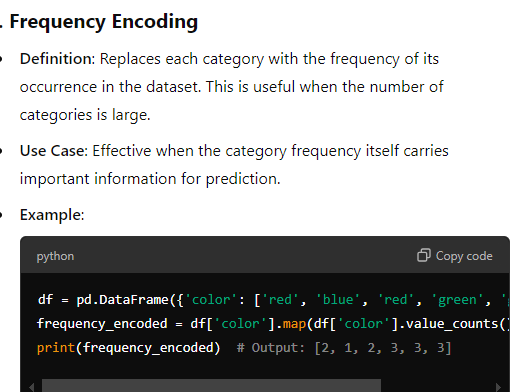

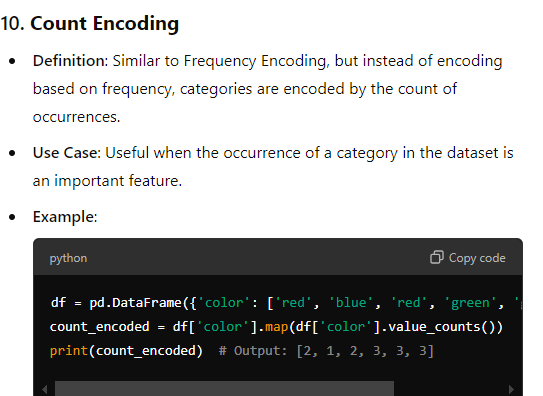

# Short Notes 

read csv file

convert categorical data by dummies then merged as new colm

trained given data on linear regression object to generate model

predict single element or whole dataframe


convert categorical data by label encoding(0,1,2) then OHE

trained given data on linear regression object to generate model

predict single element or whole dataframe

https://www.debug.school/rakeshdevcotocus_468/how-to-preprocessing-transformations-to-different-columns-within-a-dataset-using-columntransformer-with-pipeline-4jdb

# QUESTION

In [79]:
dummies = pd.get_dummies(df.town)
dummies = dummies.astype(int)
dummies

merged = pd.concat([df,dummies],axis='columns')  or  combined_df = df.join(dummies)

final = merged.drop(['town'], axis='columns')

#different way to drop
columns_to_drop = ['town', 'monroe township']  # Add any other columns you want to drop
final_df = combined_df.drop(columns=columns_to_drop, axis='columns')
final = final.drop(['west windsor'], axis='columns')

# way to seprate x data or convert to 2D
X = dfle[['town','area']].values

ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

model.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (4193409999.py, line 5)

In [40]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [41]:
import pandas as pd

# Specify the path to your CSV file
file_path = r'R:\ML\ML nd Dl by codebasics\csv\homeprices_ohe.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [42]:
print("Column names:", df.columns)

Column names: Index(['town', 'area', 'price'], dtype='object')


In [43]:
#Using pandas to create dummy variables

In [44]:
dummies = pd.get_dummies(df.town)
dummies = dummies.astype(int)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [45]:
print("Column names:", dummies.columns)

Column names: Index(['monroe township', 'robinsville', 'west windsor'], dtype='object')


In [46]:
merged = pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [47]:
final = merged.drop(['town'], axis='columns')
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [48]:
combined_df = df.join(dummies)
print(combined_df)

               town  area   price  monroe township  robinsville  west windsor
0   monroe township  2600  550000                1            0             0
1   monroe township  3000  565000                1            0             0
2   monroe township  3200  610000                1            0             0
3   monroe township  3600  680000                1            0             0
4   monroe township  4000  725000                1            0             0
5      west windsor  2600  585000                0            0             1
6      west windsor  2800  615000                0            0             1
7      west windsor  3300  650000                0            0             1
8      west windsor  3600  710000                0            0             1
9       robinsville  2600  575000                0            1             0
10      robinsville  2900  600000                0            1             0
11      robinsville  3100  620000                0            1 

In [49]:
combined_dfs = df.assign(**dummies)
print(combined_dfs)

               town  area   price  monroe township  robinsville  west windsor
0   monroe township  2600  550000                1            0             0
1   monroe township  3000  565000                1            0             0
2   monroe township  3200  610000                1            0             0
3   monroe township  3600  680000                1            0             0
4   monroe township  4000  725000                1            0             0
5      west windsor  2600  585000                0            0             1
6      west windsor  2800  615000                0            0             1
7      west windsor  3300  650000                0            0             1
8      west windsor  3600  710000                0            0             1
9       robinsville  2600  575000                0            1             0
10      robinsville  2900  600000                0            1             0
11      robinsville  3100  620000                0            1 

In [50]:
#Dropping Multiple Columns:
columns_to_drop = ['town', 'monroe township']  # Add any other columns you want to drop
final_df = combined_df.drop(columns=columns_to_drop, axis='columns')
final_df

,area,price,robinsville,west windsor
0,2600,550000,0,0
1,3000,565000,0,0
2,3200,610000,0,0
3,3600,680000,0,0
4,4000,725000,0,0
5,2600,585000,0,1
6,2800,615000,0,1
7,3300,650000,0,1
8,3600,710000,0,1
9,2600,575000,1,0


In [51]:
final = final.drop(['west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [52]:
X = final.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [53]:
y = final.price

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [55]:
model.fit(X,y)

LinearRegression()

In [56]:
model.predict(X) # 2600 sqr ft home in new jersey

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [57]:
model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor

C:\Users\rakes\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [58]:
model.score(X,y)

0.9573929037221873

In [59]:
model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor

C:\Users\rakes\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [60]:

model.predict([[2800,0,1]]) # 2800 sqr ft home in robbinsville

C:\Users\rakes\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [61]:
model.score(X,y)

0.9573929037221873

In [62]:
model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor

C:\Users\rakes\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [63]:
model.predict([[2800,0,1]]) # 2800 sqr ft home in robbinsville

C:\Users\rakes\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [64]:
#Using sklearn OneHotEncoder

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [66]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [77]:
X = dfle[['town','area']].values

In [68]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [70]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [71]:
X = X[:,1:]

In [72]:
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [73]:
model.fit(X,y)

LinearRegression()

In [74]:
model.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

array([681241.6684584])

In [75]:
model.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

In [76]:
#convert text data into numerical format
#use dummy varible,label,ohe.through colunm transformer
#fill by zero in linear regression see
# map and lambda===http://localhost:8888/notebooks/decisiontree.ipynb
#replace ==http://localhost:8888/notebooks/bagging_exercise.ipynb